In [1]:
import os
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten,MaxPooling2D,Conv2D, BatchNormalization
from keras import optimizers
from PIL import Image


# 分類クラス
classes = ['ari', 'nashi']
nb_classes = len(classes)
batch_size_for_data_generator = 128

base_dir = "/Users/watanabekeisuke/Documents/修士論文/乱気流/乱気流画像２/乱気流画像２２"
train_dir = os.path.join(base_dir, 'train')
#validation_dir = os.path.join(base_dir, 'test')
test_dir = os.path.join(base_dir, 'test')

train_ari_dir = os.path.join(train_dir, 'ari')
train_nashi_dir = os.path.join(train_dir, 'nashi')

test_ari_dir = os.path.join(test_dir, 'ari')
test_nashi_dir = os.path.join(test_dir, 'nashi')


img_rows, img_cols = 432, 288
ResNet50 = ResNet50(include_top=False, weights=None ,input_tensor=Input(shape=(img_rows,img_cols,1)))


train_datagen = ImageDataGenerator(rescale=1.0 / 255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(img_rows, img_cols),color_mode='grayscale',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator,shuffle=True)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)
validation_generator = test_datagen.flow_from_directory(directory=test_dir,target_size=(img_rows, img_cols),color_mode='grayscale',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator,shuffle=True)


top_model=Sequential()
top_model.add(Flatten(input_shape=ResNet50.output_shape[1:]))
top_model.add(Dense(nb_classes, activation='softmax'))
model = Model(inputs=ResNet50.input, output=top_model(ResNet50.output))



model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])
history = model.fit_generator(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=20,verbose=1) 


import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

test_generator = test_datagen.flow_from_directory(directory=test_dir,target_size=(img_rows, img_cols),color_mode='grayscale',classes=classes,class_mode='categorical',batch_size=batch_size_for_data_generator)

test_loss, test_acc = model.evaluate_generator(test_generator, steps=5)
print('test acc:', test_acc)

Using TensorFlow backend.















Found 3000 images belonging to 2 classes.
Found 600 images belonging to 2 classes.




/Users/watanabekeisuke/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
25/25 [==============================] - 6405s 256s/step - loss: 0.4258 - acc: 0.8956 - val_loss: 6.9304 - val_acc: 0.5000
Epoch 2/50
25/25 [==============================] - 9159s 366s/step - loss: 0.1456 - acc: 0.9479 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 3/50
25/25 [==============================] - 5390s 216s/step - loss: 0.1270 - acc: 0.9576 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 4/50
25/25 [==============================] - 5263s 211s/step - loss: 0.0738 - acc: 0.9787 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/50
25/25 [==============================] - 5317s 213s/step - loss: 0.0921 - acc: 0.9701 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 6/50
25/25 [==============================] - 5272s 211s/step - loss: 0.0644 - acc: 0.9808 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 7/50
25/25 [==============================] - 5565s 223s/step - loss: 0.0658 - acc: 0.9834 - v

KeyboardInterrupt: 

※自宅PCの計算スペックでは学習にかなりの時間がかかってしまうため、実行を中断しています。
　　　下記に大学院時代に行った学習結果を掲載します。

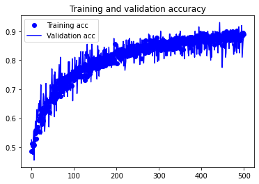